This notebook is made using the official object detection API documentation using Tensorflow.



This notebook focuses on custom object detection and making a bounding box around the object which in this case is a 'car'.



In [ ]:
!pip install tensorflow==2.9.2
import tensorflow as tf        

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(tf.__version__)          #to check the version of tensorflow.

2.9.2


In [ ]:
!pip install tensorflow-gpu     #GPU for faster processing and more computation power than CPU.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 7.0 kB/s 
     |████████████████████████████████| 439 kB 69.8 MB/s 
     |████████████████████████████████| 1.7 MB 50.8 MB/s 
     |████████████████████████████████| 6.0 MB 56.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [ ]:
!git clone https://github.com/tensorflow/models.git       #cloning the official tensorflow repo from github for the setup of object detection
                                                          #cloning TFOD 2.0 github.

Cloning into 'models'...
remote: Enumerating objects: 79106, done.
remote: Counting objects: 100% (427/427), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 79106 (delta 217), reused 361 (delta 179), pack-reused 78679
Receiving objects: 100% (79106/79106), 593.94 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (56213/56213), done.


In [ ]:
pwd    #the current directory in which you are working is displayed through 'pwd' command.

'/content'

In [ ]:
cd /content/models/research   

/content/models/research


In [ ]:
pwd

'/content/models/research'

here protobuf installation is taking place. Tensorflow object detection uses protobuf libraries  to configure model and training parameters. Also it is being installed in research folder in models.this is also a bash command.


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.   

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git   #this is done for cloning  cocoAPI which is one of the dependencies of the tensorflow object detection API.

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 11.05 MiB/s, done.
Resolving deltas: 100% (576/576), done.


change current directory to 'cocoapi/PythonAPI'.

In [ ]:
cd cocoapi/PythonAPI     

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make    #for compilation of cocoapi we use 'make' function. !make is a bash command 

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7


This is done to copy entire directories by using the recursive flag. Here 'pycocotools' directory is being copied into '/content/models/research'.


In [ ]:
cp -r pycocotools /content/models/research  

In order to reach the research folder of models directory. (Move a level up)

In [ ]:
cd ..   

/content/models/research/cocoapi


In [ ]:
cd ..   

/content/models/research


  Installation of the Object Detection API is achieved by installing the object_detection package.

In [ ]:
cp object_detection/packages/tf2/setup.py .


In [ ]:
!python -m pip install .                         

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 23.6 MB/s 
     |████████████████████████████████| 352 kB 72.1 MB/s 
     |████████████████████████████████| 2.2 MB 58.3 MB/s 
     |████████████████████████████████| 25.0 MB 1.3 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 116 kB 69.7 MB/s 
     |████████████████████████████████| 636 kB 57.1 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |██

From within TensorFlow/models/research/. this is done to test the installation of object_detection package.

In [ ]:

!python object_detection/builders/model_builder_tf2_test.py          

2022-11-23 04:17:37.736602: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-23 04:17:37.736803: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-23 04:17:37.736826: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Traceback (most recent call last):
  File "object_detection/builders/model_builder_tf2_test.py", line 24, in <module>
    from object_detection.builders import model_b

I havent used the BDD100 10 K images as there was no label(annotation) file for it. The labels file had annotations of 100KBDD images.

In [ ]:
''' 
    training_demo is a folder which we have created .It is temporary as it gets recycled once the runtime of notebook is deleted. 
    training_demo has 5 folders:
    1.annotations: In the beginning it only contains label_map.pbtxt.
      Structure of label_map.pbtxt: item {
                                            id: 1
                                            name: 'car'
                                         }
      TensorFlow requires a label map, which namely maps each of the used labels to an integer values. This label map is used both by the training and detection processes.
    2.images:For annotating the images we have used labelaiMG. It has 2 folders:-
      a)train- Contains images (in jpeg format) for training the model and their associated xml (annotation) files (with label).
      b)test- Contains images for testing and their associated xml files.
    3.exported_models: This folder will initially remain empty but will later on (after executing some commands) will contain our final model once it is trained.
    4.models
    5.pre-trained-models

'''

'''
    training_demo has 4 files which were all given in the documentation.
    1.model_main_tf2
    2.exporter_main_t2
    3.export_tflite_graph_tf2
    4.generate tfrecord.py 
    
'''

 changing directory to '/content/training_demo/pre-trained-models'.
                                                  pre-trained-models contains our ssd resnet 101 v1 fpn 640x640 model. (This is an example of transer learning as we are using a pretrained model for our object detection task)

In [ ]:
cd /content/training_demo/pre-trained-models     

/content/training_demo/pre-trained-models


Now we are trying to get 'ssd resnet 101 v1 fpn 640x640 model' from **tensorflow model zoo** in 'pre-trained-models' directory.

In [ ]:
#This will directly download the zip file in our pre-trained-models directory
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz


--2022-11-06 10:22:01--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M  74.2MB/s    in 5.0s    

2022-11-06 10:22:06 (74.2 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [ ]:
#for extraction of zip file.
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


Now this is the structure of our pre-trained-models


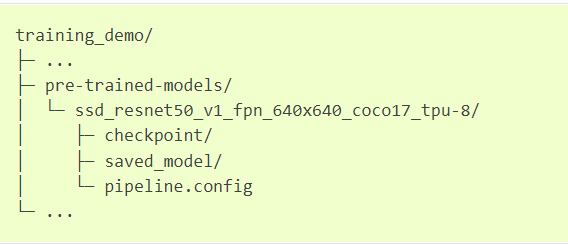


**CREATE TENSORFLOW RECORDS**

In [ ]:
pwd

'/content/training_demo/pre-trained-models'

In [ ]:
cd /content/training_demo

/content/training_demo


Here we are converting our xml files(mainly our bounding box coordinates) into tfrecord files using generate_tfrecord.py so that it is understandable by the training model.

In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

2022-11-06 10:25:32.537437: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/training_demo/annotations/train.record


In [ ]:
# Create test data:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

2022-11-06 10:25:52.574016: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


In [ ]:
'''
Now we have created a folder "my_ssd_resnet101_v1_fpn" inside models directory and copy the pipeline.config file from pre-trained models to folder "my_ssd_resnet101_v1_fpn".
Some changes that are made to the pipeline config: 
1. No. of classes: 1  
2. Batch Size: 4       
3. No. of steps: 2000
4. Fine_tune_checkpoint_type: "detection"
5. use_bfloat16: false   (As we are using GPU instead of TPU)
6. fine_tune_checkpoint
7. path to label_map.pbtxt
8. path of test.record
9. path of train.record.

'''

'\nNow we have created a folder "my_ssd_resnet101_v1_fpn" inside models directory and copy the pipeline.config file from pre-trained models to folder "my_ssd_resnet101_v1_fpn".\nSome changes that are made to the pipeline config: \n1. No. of classes: 1  \n2. Batch Size: 4       \n3. No. of steps: 2000\n4. Fine_tune_checkpoint_type: "detection"\n5. use_bfloat16: false   (As we are using GPU instead of TPU)\n6. fine_tune_checkpoint\n7. path to label_map.pbtxt\n8. path of test.record\n9. path of train.record.\n\n'

In [ ]:
pwd

'/content/training_demo'

In [ ]:
ls   #to list all the folders/files in the current path

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py
exported_models/     generate_tfrecord.py        models/
exporter_main_v2.py  images/                     pre-trained-models/


**Training of our model using weights**

In [ ]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config  

2022-11-06 11:45:13.926817: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1106 11:45:18.540052 139647270999936 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I1106 11:45:18.545328 139647270999936 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1106 11:45:18.545492 139647270999936 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1106 11:45:18.576416 139647270999936 deprecation.py:356] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental_distribute_da

In [ ]:
pwd

'/content/training_demo'

Exporting the model in 'exported_models'

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/training_demo/exported_models/my_model

2022-11-06 12:29:42.638843: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1106 12:29:50.022480 139696540145536 deprecation.py:628] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1106 12:30:15.857996 139696540145536 save_impl.p

Inferencing our model.

Loading model...Done! Took 20.218952178955078 seconds
Running inference for /content/training_demo/images/train/image3.jpg... Done


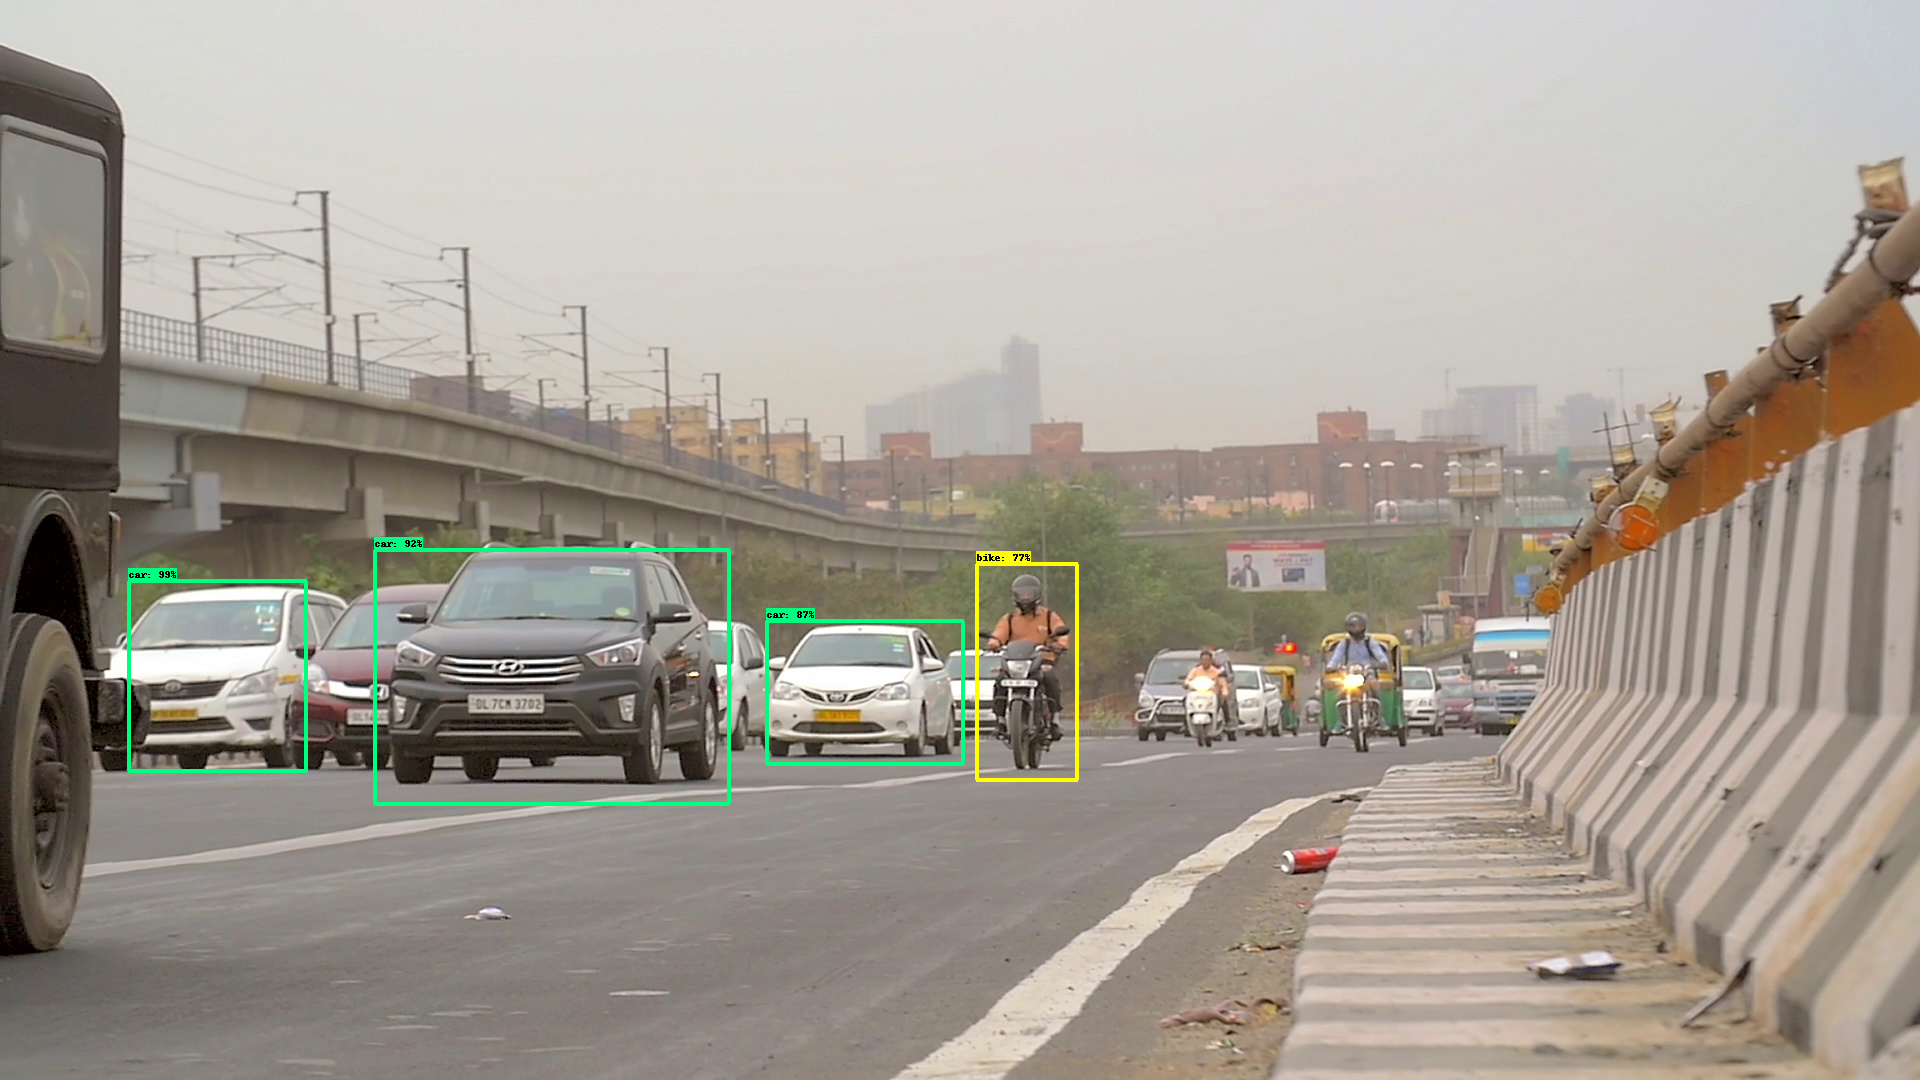

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/train/image3.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)
print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSE

In [ ]:
'''
Here the model has batch_size of 4 and is running for 4000 steps.
To achieve a better accuracy batch_size can be increased and no. of steps can also be increased.
'''

'\nHere the model has batch_size of 4 and is running for 4000 steps.\nTo achieve a better accuracy batch_size can be increased and no. of steps can also be increased.\n'